# Multivariable Linear Regression - House Prices

The course uses *Boston House Price* data originally available from [scikit-learn](https://scikit-learn.org/stable/) as one of the [Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html). This dataset is no longer available - it appears to have been removed as it contained racist data variables. Instead, we will use the *California Housing* [Real world dataset](https://scikit-learn.org/stable/datasets/real_world.html).

## Imports and Packages

In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the California Housing Dataset

In [2]:
california_dataset = fetch_california_housing()

## Explore the Dataset

In [3]:
# Find out what the data set contains.
dir(california_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

This shows the dataset contains a number of components:
* A description of the dataset.
* The data contained the dataset.
* An array of feature names - i.e., the column names of the features.
* A frame - which appears to be empty as it reports 'None'.
* The target data - which is the median house value for California districts.
* The name of the target data - i.e. the column name for the target data.

In [4]:
# See what the "Description" element says:
print(california_dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Data Points and Features

In [5]:
# Find the type of the data - an n-dimensional array.
type(california_dataset.data)

numpy.ndarray

In [6]:
# Find the number of rows and columns - 20,640 by 8.
print("Number or rows and columns: ", california_dataset.data.shape)

Number or rows and columns:  (20640, 8)


In [7]:
# Print the column names or features.
print("The features (columns) contained in the data set: ", california_dataset.feature_names)

The features (columns) contained in the data set:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# The target variable (as noted in the description) is "The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000)":
print("The target of the data set:", california_dataset.target)

The target of the data set: [4.526 3.585 3.521 ... 0.923 0.847 0.894]


## Data Exploration with Pandas Data Frames

In [9]:
# Create a Pandas data frame:
data = pd.DataFrame(data=california_dataset.data, columns=california_dataset.feature_names)

# Add a column with the median house price (target)
data['MEDPRICE'] = california_dataset.target

In [10]:
# Show the top 5 rows:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDPRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Show the bottom 5 rows:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDPRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [12]:
# The number of rows in each column:
data.count()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
MEDPRICE      20640
dtype: int64

## Cleaning Data - Check for missing values

In [13]:
# Check if there are any missing values in each column. This checks for null values in the rows:
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
MEDPRICE      False
dtype: bool

In [14]:
# We can also use the info() function to do this - as well as providing some other information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDPRICE    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Visualising the Data - Histograms

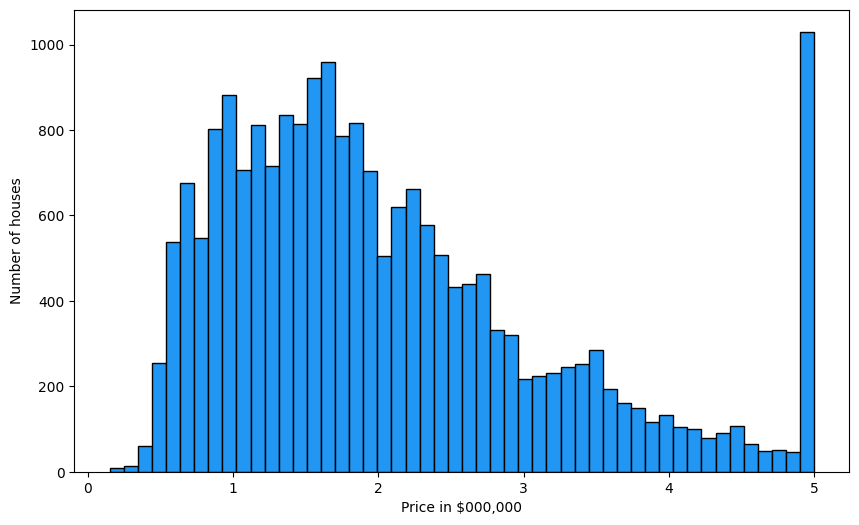

In [15]:
# Plot a histogram using MatplotLib
plt.figure(figsize=[10, 6])
plt.hist(data.MEDPRICE, bins=50, ec='black', color='#2196f3')
plt.xlabel("Price in $000,000")
plt.ylabel("Number of houses")
plt.show()

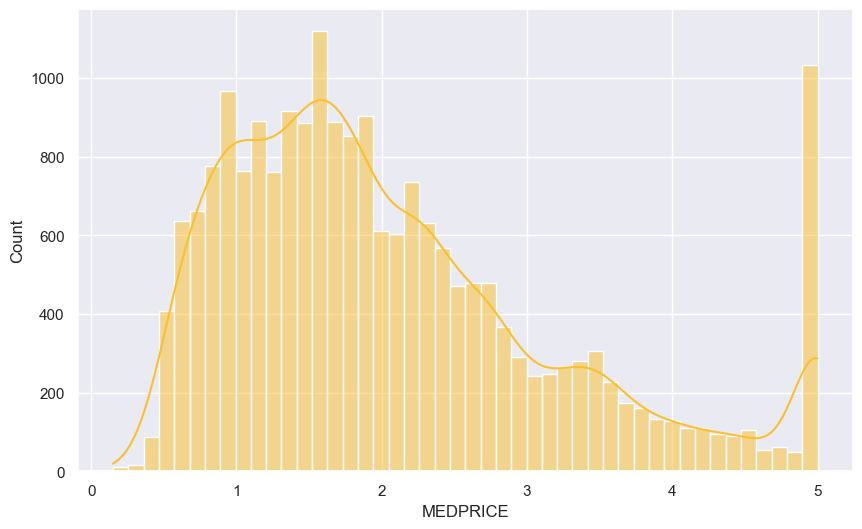

In [32]:
# Plot histogram and density using Seaborn library
# sns.distplot(data.MEDPRICE)
# distplot() has been deprecated and will be removed in future versions of seaborn. Recommended to use displot or histpolt instead.
plt.figure(figsize=[10,6])
sns.set_theme()
sns.histplot(data.MEDPRICE, color='#FBC02D', kde=True)
plt.show()

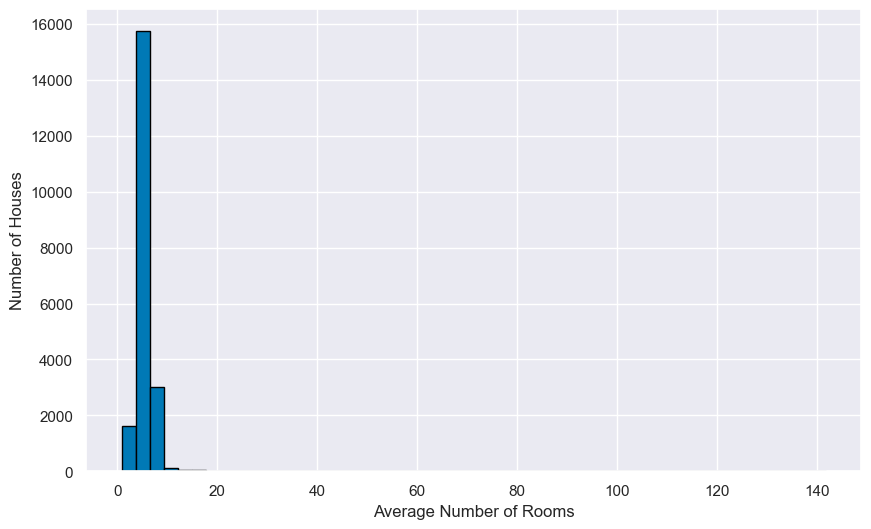

The maximum average number of rooms is:  141.9090909090909


In [50]:
# Plot histogram for number of rooms
plt.figure(figsize=[10, 6])
plt.hist(data.AveRooms, bins=50, ec='black', color='#0079b6')
plt.xlabel("Average Number of Rooms")
plt.ylabel("Number of Houses")
plt.show()
print("The maximum average number of rooms is: ", data.AveRooms.max())

This shows a histogram for the average number of rooms. There is at least one outlier since the maximum average number of rooms is 141.9090, while most regions have an average of around 4-6 rooms. To see this clearer, we can constrain the plot to look at only up to an average number of 10:

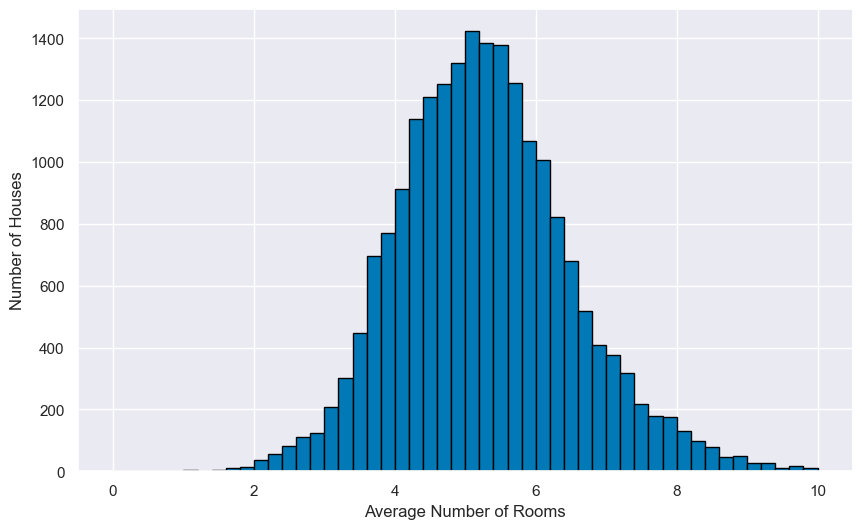

In [61]:
plt.figure(figsize=[10, 6])
plt.hist(data.AveRooms, bins=50, range=(0, 10), ec='black', color='#0079b6')
plt.xlabel("Average Number of Rooms")
plt.ylabel("Number of Houses")
plt.show()

This shows the average number of rooms in this range is distributed essentially normally, and that most houses have an average of approximately 5 rooms. We can also find the overall average for the dataset by using the mean function:

In [62]:
# Find the overall average number of rooms for the complete data set.
data.AveRooms.mean()

5.428999742190376